# Decision Tree

In [1]:
import pandas as pd 

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Visualization
from sklearn import tree
from matplotlib import pyplot as plt 

# Load Data

In [2]:
df = pd.read_csv("./dataset/immun.csv")
df.head()

,age,sickness,city,immun
0,old,yes,Aachen,low
1,old,no,Aachen,low
2,old,no,Aachen,low
3,mid,yes,Berlin,low
4,mid,yes,Berlin,low


# Split Data

In [3]:
# 1. input/output

inputs = df.drop("immun", axis = "columns")
inputs.head()

target = df[["immun"]]
target.head()


# 2. Split Train and Test --> Jump it

,immun
0,low
1,low
2,low
3,low
4,low


# Label Encoding 

convert the strings in my df into numbers..
1. Age LabelEncoder 
2. Sickness LabelEncoder
3. City LE
4. IMMUN LE

In [4]:
# 1. Create the Label Encoders
le_age = LabelEncoder()
le_sickness = LabelEncoder()
le_city = LabelEncoder()
le_immun = LabelEncoder()


# 2. (Calculate the Table) the LabelEncoder (fit) ---> Transform: Do the change
inputs["age"] = le_age.fit_transform(inputs["age"])
inputs["sickness"] = le_sickness.fit_transform(inputs["sickness"])
inputs["city"] = le_city.fit_transform(inputs["city"])


target["immun"] = le_immun.fit_transform(target["immun"])



C:\Users\M\AppData\Local\Temp\ipykernel_7088\1731067991.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target["immun"] = le_immun.fit_transform(target["immun"])


In [5]:
inputs.head(10)

,age,sickness,city
0,2,1,0
1,2,0,0
2,2,0,0
3,0,1,1
4,0,1,1
5,0,0,1
6,0,0,2
7,1,1,2
8,1,0,2
9,1,0,2


### Show the Encoding Table (Classes)

In [6]:
le_age.classes_

array(['mid', 'new', 'old'], dtype=object)

In [7]:
# Add all encoders in a list
encoders = [le_age, le_sickness, le_city, le_immun]

# Loop over each encoder and show the results

for encoder in encoders:

    encoding ={}

    for i in list(encoder.classes_):
        encoding[i] = encoder.transform([i])[0]

    print(encoding)


{'mid': 0, 'new': 1, 'old': 2}
{'no': 0, 'yes': 1}
{'Aachen': 0, 'Berlin': 1, 'Frankfurt': 2}
{'high': 0, 'low': 1}


# Build and Train the model

In [8]:
# Create the model
model = DecisionTreeClassifier( random_state= 40 )

# Train the model
model.fit(inputs, target)

DecisionTreeClassifier(random_state=40)

# Score

In [9]:
model.score(inputs, target) # normalewise mit Test data

1.0

# Manual Prediction

1. Case: Middle ages, with sickness aus Berlin --> Immun ?

In [10]:
user_age = 0 # "mid"
user_sickness = 1 # "yes"
user_city = 1 #  "Berlin"


model.predict([[user_age, user_sickness, user_city]]) # 1 Mean (Low Immun System) 


c:\Python\Python3108\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Tree Information

In [11]:
print(model.classes_)
print(model.feature_names_in_)
print(model.get_depth()) # 3 
print(model.get_n_leaves()) # 4 

[0 1]
['age' 'sickness' 'city']
3
4


# Visualize the Tree

In [12]:
# Export the structure of the tree as text
text_visual = tree.export_text(model)
print(text_visual)

|--- feature_2 <= 1.50
|   |--- feature_0 <= 1.00
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|   |--- feature_0 >  1.00
|   |   |--- class: 1
|--- feature_2 >  1.50
|   |--- class: 0



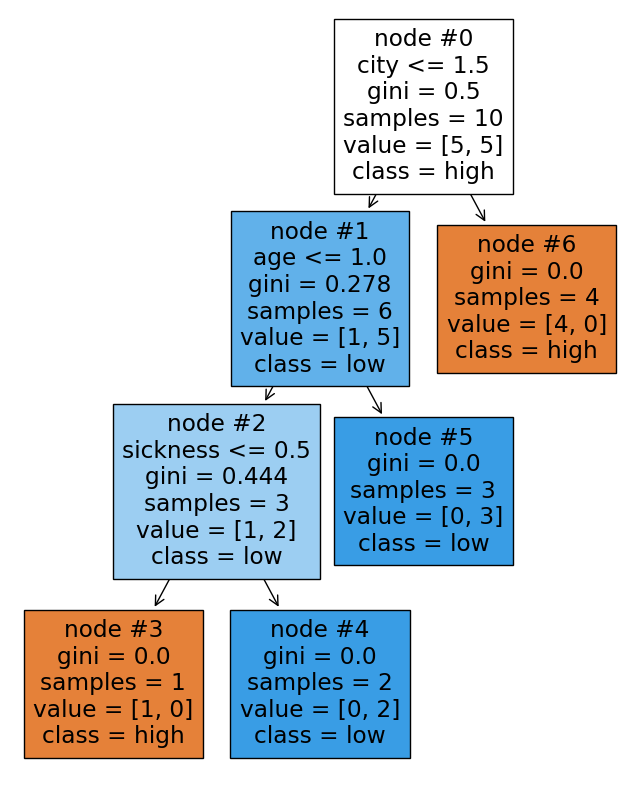

In [13]:
# Visualize
target_classes = le_immun.classes_  # high low

fig = plt.figure(figsize=(8,10))

x = tree.plot_tree(model, 
                   feature_names= model.feature_names_in_,
                   class_names= target_classes,
                   filled = True,
                   node_ids= True)


